In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#removes header, footer
pop = (pd.read_csv("M810011 - Singapore Residents By Age Group, Ethnic Group And Sex, End June, Annual.csv",
                  skiprows= 4, nrows= 75)
#replaces "NA" with NaN
       .replace(" na ",np.nan)
#removes columns with NaN/missing data
       .dropna(axis = 1)
       .set_index(" Variables "))
# removes space from values
pop.columns = pop.columns.str.strip()
pop[pop.columns.tolist()] = pop[pop.columns.tolist()].replace({"\$": "", ",": "", " ":""}, regex=True)
#cast column into int
pop = pop.astype(int)
#rename variables to young/old dependents, working adults, totals and rows to be dropped
col = [""] + ["Young Dependent"]*3 + ["Working"]*10 + ["Drop"]*5 + ["Old Dependent"] + ["Drop"]*5
var = ['Total Resident ' + i for i in col] + ['Total Male ' + i for i in col] + ['Total Female ' + i for i in col]
pop["Variables"] = var
#remove rows to be dropped
pop = (pop[~pop["Variables"].str.contains("Drop")]
#group rows based on variables
       .groupby("Variables").sum())
pop = pop.transpose()
#reorder columns
pop = pop[['Total Resident ', 'Total Resident Working', 'Total Resident Young Dependent', 'Total Resident Old Dependent',
           'Total Male ', 'Total Male Working', 'Total Male Young Dependent', 'Total Male Old Dependent',
           'Total Female ', 'Total Female Working', 'Total Female Young Dependent', 'Total Female Old Dependent']]
pop.columns = pop.columns.str.strip()
pop.head()

Variables,Total Resident,Total Resident Working,Total Resident Young Dependent,Total Resident Old Dependent,Total Male,Total Male Working,Total Male Young Dependent,Total Male Old Dependent,Total Female,Total Female Working,Total Female Young Dependent,Total Female Old Dependent
2000,3273363,2320436,717631,235296,1634667,1158208,370595,105864,1638696,1162228,347036,129432
2001,3325902,2358223,724040,243639,1658558,1175332,373774,109452,1667344,1182891,350266,134187
2002,3382944,2403238,728682,251024,1684295,1195772,375924,112599,1698649,1207466,352758,138425
2003,3366891,2402182,716071,248638,1673401,1194348,369262,109791,1693490,1207834,346809,138847
2004,3413266,2446106,702619,264541,1695031,1215986,362168,116877,1718235,1230120,340451,147664


In [3]:
elec = (pd.read_csv("M890841 - Electricity Generation And Consumption, Annual.csv",skiprows= 4, nrows=18)
#replaces "NA" with NaN
       .replace(" na ",np.nan)
#removes columns with NaN/missing data
       .dropna(axis = 1)
       .set_index(" Variables "))
# removes space from columns and column names
elec.columns = elec.columns.str.strip()
elec[elec.columns.tolist()] = elec[elec.columns.tolist()].replace({"\$": "", ",": "", " ":""}, regex=True)
elec.index = elec.index.str.strip("* ")
#cast column into int
elec = elec.astype(float)
elec = elec.transpose()
elec.head()

Variables,Electricity Generation,Electricity Consumption,Industrial-related,Manufacturing,Construction,Utilities,Other Industrial-related,Commerce And Service-related,Wholesale And Retail Trade,Accommodation And Food Services,Information And Communications,Financial And Insurance Activities,Real Estate Activities,"Professional, Scientific & Technical, Administration & Support Activities",Other Commerce And Service-related,Transport-related,Households,Others
2005,38212.7,35489.3,14509.0,13836.1,234.8,411.0,27.2,13075.6,2109.8,1031.3,667.2,1291.9,3712.4,650.2,3612.7,1200.0,6092.5,612.1
2006,39480.4,36801.8,15115.4,14397.2,250.5,441.8,25.9,13785.7,1977.2,1087.0,708.7,1659.7,3780.8,740.5,3831.8,1245.4,6109.1,546.2
2007,41134.1,38304.9,15819.0,14943.2,279.1,569.2,27.5,14520.6,1891.9,1131.5,761.2,2014.6,3810.0,834.2,4077.2,1300.2,6163.7,501.5
2008,41669.6,38986.9,16030.9,15032.7,300.9,668.4,29.0,15004.6,1924.7,1171.7,844.5,2014.9,3931.2,842.0,4275.7,1399.8,6094.0,457.6
2009,41800.6,38822.9,15570.3,14539.7,308.3,691.9,30.4,14800.1,1821.4,1169.2,866.0,1865.4,4050.8,778.4,4248.8,1607.8,6430.8,413.9


In [4]:
#join the 2 dataframes by index
df = elec.join(pop)
df.head()


,Electricity Generation,Electricity Consumption,Industrial-related,Manufacturing,Construction,Utilities,Other Industrial-related,Commerce And Service-related,Wholesale And Retail Trade,Accommodation And Food Services,...,Total Resident Young Dependent,Total Resident Old Dependent,Total Male,Total Male Working,Total Male Young Dependent,Total Male Old Dependent,Total Female,Total Female Working,Total Female Young Dependent,Total Female Old Dependent
2005,38212.7,35489.3,14509.0,13836.1,234.8,411.0,27.2,13075.6,2109.8,1031.3,...,695319,279693,1721139,1239696,357971,123472,1746675,1253106,337348,156221
2006,39480.4,36801.8,15115.4,14397.2,250.5,441.8,25.9,13785.7,1977.2,1087.0,...,686165,294726,1748242,1265091,352910,130241,1777652,1279912,333255,164485
2007,41134.1,38304.9,15819.0,14943.2,279.1,569.2,27.5,14520.6,1891.9,1131.5,...,678459,305586,1775477,1291712,348856,134909,1807605,1307325,329603,170677
2008,41669.6,38986.9,16030.9,15032.7,300.9,668.4,29.0,15004.6,1924.7,1171.7,...,671307,315790,1802992,1318970,344461,139561,1839667,1336592,326846,176229
2009,41800.6,38822.9,15570.3,14539.7,308.3,691.9,30.4,14800.1,1821.4,1169.2,...,667851,330132,1844732,1356640,341913,146179,1889144,1379253,325938,183953


In [5]:
#show pearson correlation wiht pandas
vis = df.corr().loc[:"Others", "Total Resident":]
vis.style.background_gradient(cmap='PiYG')

,Total Resident,Total Resident Working,Total Resident Young Dependent,Total Resident Old Dependent,Total Male,Total Male Working,Total Male Young Dependent,Total Male Old Dependent,Total Female,Total Female Working,Total Female Young Dependent,Total Female Old Dependent
Electricity Generation,0.976931,0.922984,-0.991217,0.962583,0.972792,0.906990,-0.991277,0.959161,0.979889,0.935342,-0.990499,0.965506
Electricity Consumption,0.973140,0.912726,-0.990162,0.969531,0.968499,0.895644,-0.989633,0.966459,0.976500,0.926031,-0.990143,0.972140
Industrial-related,0.959576,0.896707,-0.984767,0.964307,0.954309,0.879053,-0.983723,0.961340,0.963440,0.910524,-0.985363,0.966823
Manufacturing,0.951618,0.887155,-0.976887,0.959441,0.946213,0.869278,-0.975656,0.956535,0.955596,0.901175,-0.977711,0.961902
Construction,0.884849,0.874942,-0.943539,0.836103,0.881427,0.865591,-0.944835,0.831292,0.887267,0.881686,-0.941388,0.840291
Utilities,0.971754,0.904970,-0.985141,0.975778,0.966962,0.886987,-0.984433,0.973179,0.975235,0.919057,-0.985337,0.977962
Other Industrial-related,0.947399,0.863311,-0.972225,0.983340,0.940538,0.841829,-0.970115,0.981799,0.952540,0.880450,-0.974094,0.984574
Commerce And Service-related,0.978033,0.923906,-0.985370,0.960852,0.974822,0.908595,-0.984940,0.957426,0.980249,0.935679,-0.985238,0.963780
Wholesale And Retail Trade,0.358690,0.183623,-0.466607,0.618075,0.341760,0.147680,-0.452763,0.625581,0.372075,0.214109,-0.482718,0.611257
Accommodation And Food Services,0.972144,0.908429,-0.979577,0.969216,0.968095,0.891464,-0.979024,0.966319,0.975033,0.921640,-0.979593,0.971667


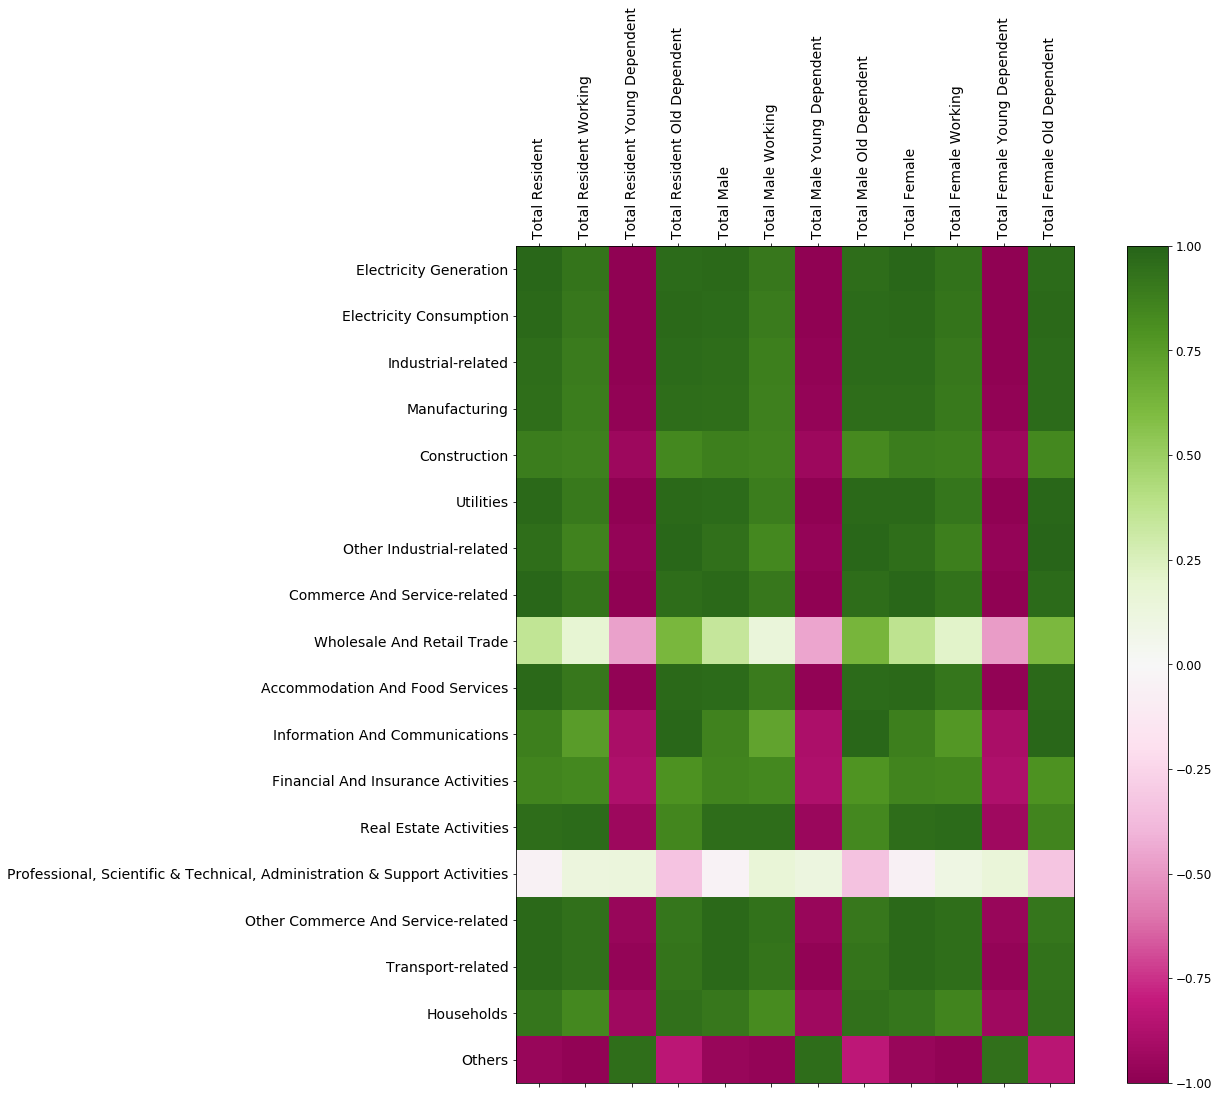

In [7]:
#plot correlation with matplotlib
f = plt.figure(figsize=(19,15))
plt.matshow(vis, fignum=f.number,cmap='PiYG', vmin=-1, vmax=1)
plt.xticks(range(12), vis.columns, fontsize=14, rotation=90)
plt.yticks(range(18), vis.index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
